<a href="https://colab.research.google.com/github/Extomvi/All-Software/blob/master/DSNnotebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
!pip install catboost

     |████████████████████████████████| 62.9MB 123kB/s 


In [0]:
pip install sklearn

In [0]:
# import the necessary packages
# import the necessary packages
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
from matplotlib import pyplot
import seaborn as sns
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
import xgboost as xgb
from xgboost import plot_importance
from sklearn import ensemble
from sklearn.ensemble import *
from sklearn.dummy import DummyClassifier
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, recall_score, classification_report, roc_auc_score
from collections import Counter
from sklearn.experimental import enable_hist_gradient_boosting  # noqa
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, ExtraTreesClassifier, VotingClassifier, HistGradientBoostingClassifier, BaggingClassifier
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold, learning_curve, KFold
from catboost import Pool, CatBoostClassifier, cv

sns.set(style='white', context='notebook', palette='deep')

## Hyperopt modules
from hyperopt import fmin, hp, tpe, Trials, space_eval, STATUS_OK, STATUS_RUNNING
from functools import partial

ModuleNotFoundError: ignored

## Get data

In [0]:
!pip install -q kaggle

In [0]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

cp: cannot stat 'kaggle.json': No such file or directory


In [0]:
!kaggle competitions download -c intercampusai2019

Traceback (most recent call last):
  File "/usr/local/bin/kaggle", line 6, in <module>
    from kaggle.cli import main
  File "/usr/local/lib/python2.7/dist-packages/kaggle/__init__.py", line 23, in <module>
    api.authenticate()
  File "/usr/local/lib/python2.7/dist-packages/kaggle/api/kaggle_api_extended.py", line 146, in authenticate
    self.config_file, self.config_dir))
IOError: Could not find kaggle.json. Make sure it's located in /root/.kaggle. Or use the environment method.


In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
!unzip test.csv.zip && unzip train.csv.zip
!rm -rf test.csv.zip && rm -rf train.csv.zip

In [0]:
train = pd.read_csv('/content/drive/My Drive/Well/train.csv')
test = pd.read_csv('/content/drive/My Drive/Well/test.csv')
train.head().transpose()

,0,1,2,3,4
EmployeeNo,YAK/S/00001,YAK/S/00002,YAK/S/00003,YAK/S/00004,YAK/S/00006
Division,Commercial Sales and Marketing,Customer Support and Field Operations,Commercial Sales and Marketing,Commercial Sales and Marketing,Information and Strategy
Qualification,"MSc, MBA and PhD",First Degree or HND,First Degree or HND,First Degree or HND,First Degree or HND
Gender,Female,Male,Male,Male,Male
Channel_of_Recruitment,Direct Internal process,Agency and others,Direct Internal process,Agency and others,Direct Internal process
Trainings_Attended,2,2,2,3,3
Year_of_birth,1986,1991,1987,1982,1990
Last_performance_score,12.5,12.5,7.5,2.5,7.5
Year_of_recruitment,2011,2015,2012,2009,2012
Targets_met,1,0,0,0,0


## Combine train and test

In [0]:
train['sep'] = "train"
test['sep'] = "test"
data = pd.concat([train, test], sort=False)
print(len(data), len(train), len(test))

54808 38312 16496


In [0]:
# data['Age'] = 2019-data['Year_of_birth']
# data['Work_years'] = 2019-data['Year_of_recruitment']
# data.head()

In [0]:
data.describe()

,Trainings_Attended,Year_of_birth,Last_performance_score,Year_of_recruitment,Targets_met,Previous_Award,Training_score_average,Promoted_or_Not
count,54808.000000,54808.000000,54808.000000,54808.000000,54808.000000,54808.000000,54808.000000,38312.000000
mean,2.253011,1986.194826,7.696869,2013.134488,0.351974,0.023172,55.386750,0.084595
std,0.609264,7.664765,3.741146,4.265094,0.477590,0.150450,13.371559,0.278282
min,2.000000,1950.000000,0.000000,1982.000000,0.000000,0.000000,31.000000,0.000000
25%,2.000000,1982.000000,5.000000,2012.000000,0.000000,0.000000,43.000000,0.000000
50%,2.000000,1988.000000,7.500000,2014.000000,0.000000,0.000000,52.000000,0.000000
75%,2.000000,1992.000000,10.000000,2016.000000,1.000000,0.000000,68.000000,0.000000
max,11.000000,2001.000000,12.500000,2018.000000,1.000000,1.000000,91.000000,1.000000


In [0]:
np.random.seed(0)
data['Year_of_birth'] = np.log(1 + data.Year_of_birth)
data['Last_performance_score'] = np.log(1 + data.Last_performance_score)
data['Year_of_recruitment'] = np.log(1 + data.Year_of_recruitment)
data['Training_score_average'] = np.log(1 + data.Training_score_average)

In [0]:
# data['Age'] = data.Age.apply(lambda x:0 if x in range(0, 18) else 1 if x in range(18, 25) else 2 if x in range(25, 40) else 3)
# data['Work_years'] = data.Work_years.apply(lambda x:0 if x in range(0, 5) else 1 if x in range(5, 10) else 2)
# data['Last_performance_score'] = data.Last_performance_score.apply(lambda x:0 if x in range(0, 5) else 1 if x in range(5, 10) else 2)

In [0]:
# data.hist(column='Work_years')

In [0]:
data.Promoted_or_Not.value_counts()

0.0    35071
1.0     3241
Name: Promoted_or_Not, dtype: int64

## Handle Missing values

In [0]:
data.isna().any()

EmployeeNo                             False
Division                               False
Qualification                           True
Gender                                 False
Channel_of_Recruitment                 False
Trainings_Attended                     False
Year_of_birth                          False
Last_performance_score                 False
Year_of_recruitment                    False
Targets_met                            False
Previous_Award                         False
Training_score_average                 False
State_Of_Origin                        False
Foreign_schooled                       False
Marital_Status                         False
Past_Disciplinary_Action               False
Previous_IntraDepartmental_Movement    False
No_of_previous_employers               False
Promoted_or_Not                         True
sep                                    False
dtype: bool

In [0]:
data.Qualification.value_counts()

First Degree or HND         36669
MSc, MBA and PhD            14925
Non-University Education      805
Name: Qualification, dtype: int64

In [0]:
data['Qualification'].fillna(data['Qualification'].mode()[0], inplace=True)
# data = data[data['Qualification'].notnull()]

## Drop Unnecessary columns

In [0]:
# data.drop(['Year_of_birth', 'Year_of_recruitment'], axis=1, inplace=True)
# data.head(3).transpose()

## Visualising Data

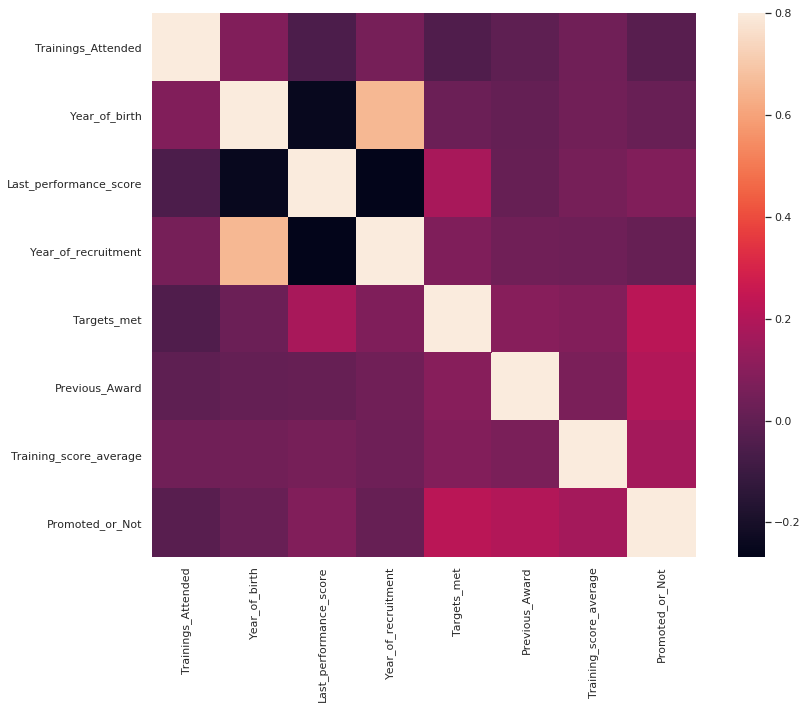

In [0]:
# Correlation matrix
corrmat = data.corr()
fig = plt.figure(figsize = (15, 10))

sns.heatmap(corrmat, vmax = .8, square = True)
plt.show()

## Handling Categorical Features

In [0]:
# continuous features
data.select_dtypes([np.number]).columns

Index(['Trainings_Attended', 'Year_of_birth', 'Last_performance_score',
       'Year_of_recruitment', 'Targets_met', 'Previous_Award',
       'Training_score_average', 'Promoted_or_Not'],
      dtype='object')

In [0]:
# identifying categorical features
categorical_features = [x for x in data.columns if data[x].dtype == 'object' and x not in ['EmployeeNo', 'sep']]
print(categorical_features)

['Division', 'Qualification', 'Gender', 'Channel_of_Recruitment', 'State_Of_Origin', 'Foreign_schooled', 'Marital_Status', 'Past_Disciplinary_Action', 'Previous_IntraDepartmental_Movement', 'No_of_previous_employers']


In [0]:
# # one-hot encoding
# from sklearn.preprocessing import LabelEncoder
# #New variable
# var_mod = [x for x in categorical_features]
# le = LabelEncoder()
# for i in var_mod:
#     data[i] = le.fit_transform(data[i].astype(str))

In [0]:


data.head()

,EmployeeNo,Division,Qualification,Gender,Channel_of_Recruitment,Trainings_Attended,Year_of_birth,Last_performance_score,Year_of_recruitment,Targets_met,Previous_Award,Training_score_average,State_Of_Origin,Foreign_schooled,Marital_Status,Past_Disciplinary_Action,Previous_IntraDepartmental_Movement,No_of_previous_employers,Promoted_or_Not,sep
0,YAK/S/00001,Commercial Sales and Marketing,"MSc, MBA and PhD",Female,Direct Internal process,2,7.594381,2.602690,7.606885,1,0,3.737670,ANAMBRA,No,Married,No,No,0,0.0,train
1,YAK/S/00002,Customer Support and Field Operations,First Degree or HND,Male,Agency and others,2,7.596894,2.602690,7.608871,0,0,3.970292,ANAMBRA,Yes,Married,No,No,0,0.0,train
2,YAK/S/00003,Commercial Sales and Marketing,First Degree or HND,Male,Direct Internal process,2,7.594884,2.140066,7.607381,0,0,3.761200,KATSINA,Yes,Married,No,No,0,0.0,train
3,YAK/S/00004,Commercial Sales and Marketing,First Degree or HND,Male,Agency and others,3,7.592366,1.252763,7.605890,0,0,3.761200,NIGER,Yes,Single,No,No,1,0.0,train
4,YAK/S/00006,Information and Strategy,First Degree or HND,Male,Direct Internal process,3,7.596392,2.140066,7.607381,0,0,4.356709,AKWA IBOM,Yes,Married,No,No,1,0.0,train


## Get Dummy variables

In [0]:
# print('Before:', data.shape)
# categorical_features = ['Gender', 'Targets_met', 'Previous_Award', 'Foreign_schooled', 'Marital_Status', 'Past_Disciplinary_Action', 'Previous_IntraDepartmental_Movement']
# # get dummy variable
# data = pd.get_dummies(data, columns = [x for x in categorical_features])
# print('After:', data.shape)

In [0]:
data.head()

,EmployeeNo,Division,Qualification,Gender,Channel_of_Recruitment,Trainings_Attended,Year_of_birth,Last_performance_score,Year_of_recruitment,Targets_met,Previous_Award,Training_score_average,State_Of_Origin,Foreign_schooled,Marital_Status,Past_Disciplinary_Action,Previous_IntraDepartmental_Movement,No_of_previous_employers,Promoted_or_Not,sep
0,YAK/S/00001,Commercial Sales and Marketing,"MSc, MBA and PhD",Female,Direct Internal process,2,7.594381,2.602690,7.606885,1,0,3.737670,ANAMBRA,No,Married,No,No,0,0.0,train
1,YAK/S/00002,Customer Support and Field Operations,First Degree or HND,Male,Agency and others,2,7.596894,2.602690,7.608871,0,0,3.970292,ANAMBRA,Yes,Married,No,No,0,0.0,train
2,YAK/S/00003,Commercial Sales and Marketing,First Degree or HND,Male,Direct Internal process,2,7.594884,2.140066,7.607381,0,0,3.761200,KATSINA,Yes,Married,No,No,0,0.0,train
3,YAK/S/00004,Commercial Sales and Marketing,First Degree or HND,Male,Agency and others,3,7.592366,1.252763,7.605890,0,0,3.761200,NIGER,Yes,Single,No,No,1,0.0,train
4,YAK/S/00006,Information and Strategy,First Degree or HND,Male,Direct Internal process,3,7.596392,2.140066,7.607381,0,0,4.356709,AKWA IBOM,Yes,Married,No,No,1,0.0,train


## Get train and test data

In [0]:
train = data[data.sep == 'train'].reset_index(drop=True)
test = data[data.sep == 'test'].reset_index(drop=True)
train.drop('sep', axis=1, inplace=True)
test.drop('sep', axis=1, inplace=True)
print(len(train), len(test))

38312 16496


In [0]:
train['Promoted_or_Not'] = train['Promoted_or_Not'].astype('int64')

## Save as CSV

In [0]:
# train.to_csv('Train.csv',index=False)
# test.to_csv('Test.csv',index=False)

## X, y split

In [0]:
train.Promoted_or_Not.value_counts()

0    35071
1     3241
Name: Promoted_or_Not, dtype: int64

In [0]:
# Get all the columns from the dataFrame
columns = train.columns.tolist()

# Filter the columns to remove data we do not want
columns = [c for c in columns if c not in ["Promoted_or_Not", "EmployeeNo"]]

# Store the variable we'll be predicting on
target = "Promoted_or_Not"

X = train[columns]
y = train[target]

# Print shapes
print(X.shape)
print(y.shape)

(38312, 17)
(38312,)


## Model Preparation

In [0]:
# setting up testing and training sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=424)
y_train.value_counts()

0    24562
1     2256
Name: Promoted_or_Not, dtype: int64

In [0]:
y_test.value_counts()

0    10509
1      985
Name: Promoted_or_Not, dtype: int64

## Models

In [0]:
# xgboost
#import xgboost as xgb
#from xgboost import XGBClassifier
#clf1 = xgb.XGBClassifier(n_estimators=500, tree_method='gpu_hist')  # THE MAGICAL PARAMETER )
#clf1.fit(X_train, y_train)

### Catboost

In [0]:
X_train.dtypes

Division                                object
Qualification                           object
Gender                                  object
Channel_of_Recruitment                  object
Trainings_Attended                       int64
Year_of_birth                          float64
Last_performance_score                 float64
Year_of_recruitment                    float64
Targets_met                              int64
Previous_Award                           int64
Training_score_average                 float64
State_Of_Origin                         object
Foreign_schooled                        object
Marital_Status                          object
Past_Disciplinary_Action                object
Previous_IntraDepartmental_Movement     object
No_of_previous_employers                object
dtype: object

In [0]:
cate_features_index = np.where(X_train.dtypes == object)[0]
cate_features_index

array([ 0,  1,  2,  3, 11, 12, 13, 14, 15, 16])

In [0]:
#pip install auto-sklearn

In [0]:
#pip install scikit-learn

In [0]:
clf8 = CatBoostClassifier(eval_metric='Accuracy',use_best_model=True,random_seed=42)
clf8.fit(X_train,y_train,cat_features=cate_features_index,eval_set=(X_test,y_test))

Learning rate set to 0.110214
0:	learn: 0.9230741	test: 0.9221333	best: 0.9221333 (0)	total: 65.3ms	remaining: 1m 5s
1:	learn: 0.9231859	test: 0.9212633	best: 0.9221333 (0)	total: 128ms	remaining: 1m 3s
2:	learn: 0.9241927	test: 0.9225683	best: 0.9225683 (2)	total: 154ms	remaining: 51.3s
3:	learn: 0.9236707	test: 0.9212633	best: 0.9225683 (2)	total: 190ms	remaining: 47.2s
4:	learn: 0.9242300	test: 0.9219593	best: 0.9225683 (2)	total: 217ms	remaining: 43.2s
5:	learn: 0.9238571	test: 0.9219593	best: 0.9225683 (2)	total: 277ms	remaining: 45.9s
6:	learn: 0.9241554	test: 0.9222203	best: 0.9225683 (2)	total: 339ms	remaining: 48.2s
7:	learn: 0.9249385	test: 0.9233513	best: 0.9233513 (7)	total: 397ms	remaining: 49.3s
8:	learn: 0.9253114	test: 0.9241343	best: 0.9241343 (8)	total: 461ms	remaining: 50.8s
9:	learn: 0.9256842	test: 0.9243083	best: 0.9243083 (9)	total: 519ms	remaining: 51.4s
10:	learn: 0.9301216	test: 0.9283104	best: 0.9283104 (10)	total: 572ms	remaining: 51.5s
11:	learn: 0.9298978	

In [0]:
print('the test accuracy is :{:.6f}'.format(accuracy_score(y_test,clf8.predict(X_test))))

the test accuracy is :0.941535


## Test

In [0]:
y_pred = clf8.predict(X_test)

In [0]:
# Run classification metrics
print('accuracy')
print(accuracy_score(y_test, y_pred))
print('f1 score')
print(f1_score(y_test, y_pred, average='weighted'))
print(classification_report(y_test, y_pred))

accuracy
0.9415347137637028
f1 score
0.9282063324329021
              precision    recall  f1-score   support

           0       0.94      1.00      0.97     10509
           1       0.96      0.33      0.49       985

    accuracy                           0.94     11494
   macro avg       0.95      0.67      0.73     11494
weighted avg       0.94      0.94      0.93     11494



In [0]:
pd.DataFrame(confusion_matrix(y_test, y_pred))

,0,1
0,10495,14
1,658,327


## Make Predictions

In [0]:
sub_test = test[columns]

# Print shapes
print(sub_test.shape)

(16496, 17)


In [0]:
sub_pred = clf8.predict(sub_test)
sub_pred

array([0., 0., 0., ..., 0., 0., 0.])

In [0]:
test["Promoted_or_Not"] = sub_pred
test["Promoted_or_Not"] = test["Promoted_or_Not"].astype('int64')

In [0]:
test.Promoted_or_Not.value_counts()

0    15987
1      509
Name: Promoted_or_Not, dtype: int64

In [0]:
submission = test[["EmployeeNo", "Promoted_or_Not"]]
submission.tail()

,EmployeeNo,Promoted_or_Not
16491,YAK/S/54797,1
16492,YAK/S/54798,0
16493,YAK/S/54800,0
16494,YAK/S/54803,0
16495,YAK/S/54804,0


In [0]:
submission.to_csv('submissionyb.csv',index=False)